# Práctica 6: Support Vector Machines

### Jorge Villarrubia Elvira y Juan Carlos Villanueva Quirós

### Parte 1: Support Vector Machines
En esta primera parte práctica trabajaremos máquinas de soporte vectorial con distintos kernels (lineal y gaussiano) sin necesidad de implementarlas. Vamos a usarlas las funciones de la librería $sklearn$ para ello.

Uno de los objetivos es prácticar la elección de los hiperparámetros de aprendizaje $C$ y $\sigma$

In [1]:
#Importamos todas las librerias y funciones externas que usamos
from scipy.io import loadmat
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import numpy as np
import codecs
import glob
from process_email import email2TokenList
from get_vocab_dict import getVocabDict
from sklearn.model_selection import train_test_split

In [2]:
#Cargamos a un diccionario los datos del fichero 
dic = loadmat("ex6data1.mat")
X = dic['X']
y = dic['y']

#### 1.1) Kernel lineal
Comenzamos cargando y visualizando los datos del fichero ex6data1.mat proporcionados para trabajar con máquinas de soorte vectorial que utilicen un kernel lineal.

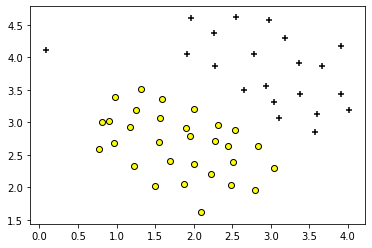

In [12]:
def visualize_points(X, y, title = None):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x1, x2 = np.meshgrid(x1, x2)
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.figure()
    if title != None:
        plt.title(title)
    plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
    plt.scatter(
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
    plt.show()

dic = loadmat("ex6data1.mat")
X = dic['X']
y = dic['y']
visualize_points(X, y)

Seguidamente entrenamos una máquina de soporte vectorial con kernel lineal y con el hiperparametro $C=1$. Representamos de nuevo los puntos junto a la frontera de decisión del modelo entrenado.

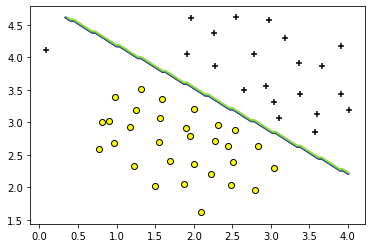

In [7]:
def visualize_boundary(X, y, svm, file_name = None):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x1, x2 = np.meshgrid(x1, x2)
    yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.figure()
    plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
    plt.scatter(
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
    plt.contour(x1, x2, yp)
    plt.show()
    
svm = SVC(kernel = 'linear', C=1.0)
svm.fit(X,y.ravel())
visualize_boundary(X, y, svm)

Podemos observar que al haber utilizado un valor de $C$ relativamente bajo el modelo no se ha ajustado excesivamente a los datos y el ejemplo discordante que hay en ellos está en el lado constrario al de sus compañeros en la frontera de decisión. Esto es bueno, porque ajustarse tanto como para tratar de incluirlo no se comportará bien con casos nuevos fuera del entrenamiento. Claramente es un caso aislado.

Entrenamos de nuevo una SVM con kernel lineal, pero con el valor $C=100$ y representamos su frontera de decisión.

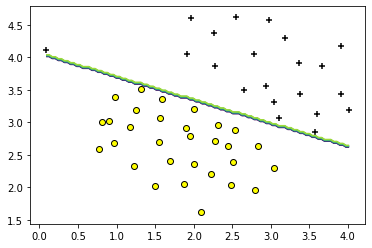

In [8]:
svm = SVC(kernel = 'linear', C=100.0)
svm.fit(X,y.ravel())
visualize_boundary(X, y, svm)

En este caso, el modelo se ha ajustado demasiado consiguiente que el caso discordante se clasifique bien, lo que sin embargo provoca una forntera que claramete separa peor las dos clases que con $C=1$

#### 1.1) Kernel gaussiano
Cargamos ahora el fichero ex6data2.mat con datos para practicar con el uso de máquinas de soporte vectorial utilizando el kernel gaussiano. Visualizamos también los datos.

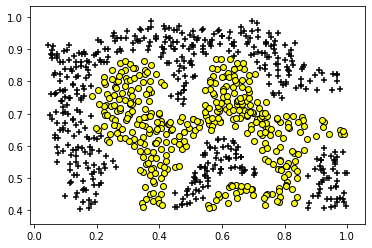

In [9]:
dic = loadmat("ex6data2.mat")
X = dic['X']
y = dic['y']
visualize_points(X, y)

La frontera de decisión en base a la representación parece bastante clara. Entrenamos una máquina de soporte vectorial con los hiperparámetros $C=1$ y $sigma=0.1$ y visualizamos la frontera de decisión que utiliza (realmente el tipo de kernel usado es rbf, pero con $gamma= 1/2\sigma^2$ es equivalente al kernel gaussiano).

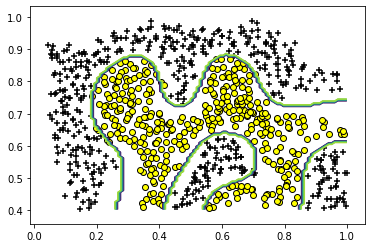

In [10]:
C = 1
sigma = 0.1
svm = SVC(kernel = 'rbf', C=C, gamma = 1/(2* sigma**2))
svm.fit(X,y.ravel())
visualize_boundary(X, y, svm)

Apreciamos la frontera obtenida por el modelo es la esperada.

#### 1.1) Elección de los parámetros $C$ y $\sigma$
Para elegir los hipermarámetros vamos a trabajar con un tercer dataset que tiene anto datos paa entrenamiento como datos para validación ya preparados. Empezamos cargando y visualizando los datos.

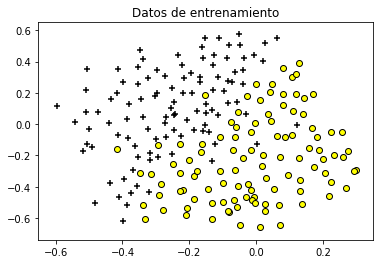

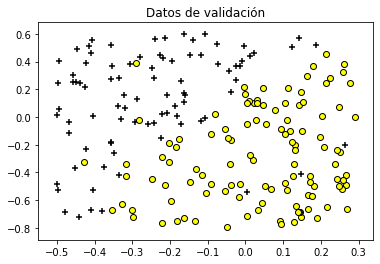

In [15]:
dic = loadmat("ex6data3.mat")
X = dic['X']
y = dic['y']
Xval = dic['Xval']
yval = dic['yval']
visualize_points(X, y, title='Datos de entrenamiento')
visualize_points(Xval, yval, title='Datos de validación')

Observamos que la frontera de decisión en este caso n está tan clara, porque las clases no son tan separable como antes, anque no son muchos los ejemplos ''complicados''. El peligro podría ser que por ajustarse en el entrenamiento a algunos de ellos, para clasificarlos correctamente, la frontera hiciera cosas extrañas que no se ajustasen al patrón general. Eso prvocaría muchos casos mal clasificados en validación (casos nuevos) y por eso el parámetro se debe escoger con otro conjunto.

Entrenamos, con los datos de entrenamiento, una SVM con kernel gaussiano con todas las posibilidades donde $C,\sigma \in\{0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30\}$ y elegimos la que mayor accuracy nos de sobre el conjuto de validación.

In [18]:
values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
scores = []
for C in values:
    for sigma in values:
        svm = SVC(kernel = 'rbf', C=C, gamma = 1/(2* sigma**2))
        svm.fit(X,y.ravel())
        scores.append(svm.score(Xval, yval))

index = np.argmax(np.array(scores))
COpt = values[index // len(values)]
sigmaOpt = values[index % len(values)]

print('Accuracy máximo sobre validación:', scores[index]*100, '%')
print('C óptimo:', COpt, '\nSigma optimo:', sigmaOpt)

Accuracy máximo sobre validación: 96.5 %
C óptimo: 1 
Sigma optimo: 0.1


Vemos que con los valores $C=1$ y $\sigma=0.1$ la precisión de nuestro clasificador sobre validación es máxima con un 96,5%.
Representamos su fronera de decisión sobre el conjunto de entrenamiento.

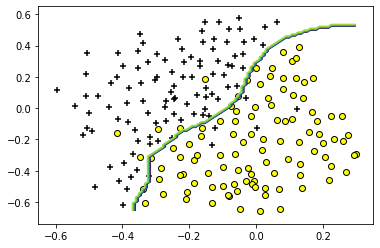

In [43]:
svm = SVC(kernel = 'rbf', C=C, gamma = 1/(2* sigma**2))
svm.fit(X,y.ravel())
visualize_boundary(X, y, svm)

Apreciamos como, efectivamente, hay bastantes casos sobre el conjunto con el que se ha entrenado que no clasifica correctamente (no se ha sobreajustado para hacerlo). Y con ello obtiene un mejor resultado que con otros parámetros para un conjuntos nuevo de datos (el de validación).

### Parte 2: Detección de spam
En la segunda parte de la práctica vamos a cargar algunos ficheros con emails correspondientes a spam (spam/nº de correo), no spam que se podría confundir con spam fácilmente (hard_ham/nº de correo) y no spam bastante claro (easy_ham/nº de correo).

Haciendo uso de las función email2TokenList eliminamos partes del email poco para nuestra labor como la cabecera o las setiquetas HTML y coseguimos listas de palabras con las que analizar los mensajes. Haciendo uso del diccionario que devuelve a función getVocabDict y las listas de palabras de cada email convertimos cada uno en una lista de 0's y 1's que indica la aparción o no de cada una de las palabras del diccionario en el email.

In [23]:
def binaryListOfEmails(directory, dicVocabulary):
    nombresFicheros = glob.glob(directory+'/*.txt')
    messageList = []
    for nombreFichero in nombresFicheros:
        email_contents = codecs.open(nombreFichero, 'r', encoding = 'utf-8', errors = 'ignore').read()
        email = email2TokenList(email_contents)
        message = np.zeros(len(dicVocabulary))
        for word in email:
            if word in dicVocabulary:
                message[dicVocabulary[word]-1] = 1
        messageList.append(message)
    return np.array(messageList)

dicVocabulary = getVocabDict()
messageSpamList = binaryListOfEmails('spam', dicVocabulary)
messageHardHamList = binaryListOfEmails('hard_ham', dicVocabulary)
messageEasyHamList = binaryListOfEmails('easy_ham', dicVocabulary)

Concatenamos los 3 tipos de emails para formarnuestro dataset sobre el que trabajar. Y generamos una clase para predecir Y con un 1 en los mensajes correspondientes a spam y un 0 en los que son hard o easy ham.

In [25]:
X = np.vstack((messageSpamList, messageHardHamList, messageEasyHamList))
Y = np.zeros(len(X))
Y[0:len(messageSpamList)] = 1
Y

array([1., 1., 1., ..., 0., 0., 0.])

Hacemos una partición del dataset para tener una parte con la que entrenar y otra con la que validar. (El 25% de nuestros datos irán para validación). La hacemos estratificada, pues la cantidad de spam y no spam no esta balanceada y si no el modelo no podría aprender a predecir diciendo mucho más una de la clases.

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=0, stratify = Y)

Entrenamos el modelo con los parametros $C,\sigma \in\{0.1, 1, 5, 10, 20, 30\}$ y nos quedamos con los mejores (os que den mayor accracy para el conjunto de validación.

In [29]:
values = [0.1, 1, 5, 10, 20, 30]
scores = []
for C in values:
    for sigma in values:
        svm = SVC(kernel = 'rbf', C=C, gamma = 1/(2* sigma**2))
        svm.fit(X_train,y_train.ravel())
        sc = svm.score(X_val, y_val)
        scores.append(sc)
        print('Con C:', C, 'sigma:', sigma, 'Accuracy:', sc)
index = np.argmax(np.array(scores))
COpt = values[index // len(values)]
sigmaOpt = values[index % len(values)]

print('Accuracy máximo sobre validación:', scores[index]*100, '%')
print('C óptimo:', COpt, '\nSigma optimo:', sigmaOpt)

Con C: 0.1 sigma: 0.1 Accuracy: 0.8486682808716707
Con C: 0.1 sigma: 1 Accuracy: 0.8486682808716707
Con C: 0.1 sigma: 5 Accuracy: 0.8486682808716707
Con C: 0.1 sigma: 10 Accuracy: 0.8619854721549637
Con C: 0.1 sigma: 20 Accuracy: 0.8486682808716707
Con C: 0.1 sigma: 30 Accuracy: 0.8486682808716707
Con C: 1 sigma: 0.1 Accuracy: 0.9019370460048426
Con C: 1 sigma: 1 Accuracy: 0.910411622276029
Con C: 1 sigma: 5 Accuracy: 0.9636803874092009
Con C: 1 sigma: 10 Accuracy: 0.9745762711864406
Con C: 1 sigma: 20 Accuracy: 0.9334140435835351
Con C: 1 sigma: 30 Accuracy: 0.9079903147699758
Con C: 5 sigma: 0.1 Accuracy: 0.9019370460048426
Con C: 5 sigma: 1 Accuracy: 0.9128329297820823
Con C: 5 sigma: 5 Accuracy: 0.9697336561743342
Con C: 5 sigma: 10 Accuracy: 0.9794188861985472
Con C: 5 sigma: 20 Accuracy: 0.9721549636803875
Con C: 5 sigma: 30 Accuracy: 0.9552058111380145
Con C: 10 sigma: 0.1 Accuracy: 0.9019370460048426
Con C: 10 sigma: 1 Accuracy: 0.9128329297820823
Con C: 10 sigma: 5 Accuracy: 0

Con los valores $C=5$ y $\sigma = 10$ se obtiene casi un 98% de precisión sobre el conjunto de validación lo cuál es más que satisfactorio sobre todo teniendo en cuenta que había mensajes de no spam que podían confundirse con spam.